# Instructions

Make a copy of this colab. Answer all questions by writing code. Run all cells and save output. Download .ipynb and submit it in canvas.

Please check back often for any updates. Last updated 2025/09/11 1:12am.

# Imports

In [2]:
from packaging import version

import sklearn
print('sklearn.__version__:', sklearn.__version__)
assert version.parse(sklearn.__version__) >= version.parse('1.0.1')

import numpy as np
np.random.seed(1237)  # 42 or some prime number

import pandas as pd
import matplotlib.pyplot as plt


sklearn.__version__: 1.6.1


In [3]:
import tensorflow as tf

print('tf.__version__:', tf.__version__)
print('GPUs:', len(tf.config.list_physical_devices('GPU')))


tf.__version__: 2.19.0
GPUs: 0


# Dataset

In [4]:
# Read about dataset https://www.kaggle.com/datasets/zalando-research/fashionmnist

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

(X_train, y_train), (X_test, y_test) = fashion_mnist


# Generate a random permutation of indices
#indices = np.random.permutation(len(X_train))

# Shuffle data and labels accordingly
#X_train_shuffled = X_train[indices]
#y_train_shuffled = y_train[indices]


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# Q1 (1 point): what is the shape of the X_train.
X_train.shape

(60000, 28, 28)

In [ ]:
# Q2 (1 point): how many different classes in y_train, and what are the class names.

unique_labels= np.unique(y_test)

#Class_names from the fashion_mnist from Kaggle page

'''
0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot
'''

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for i in unique_labels:
    print(str(i) + ' ' + class_names[i])

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot


In [ ]:
# Q3 (1 point): what is the range of values for each pixel.
unique_labels= np.unique(X_train)

(int(unique_labels.min()),int(unique_labels.max()))

(0, 255)

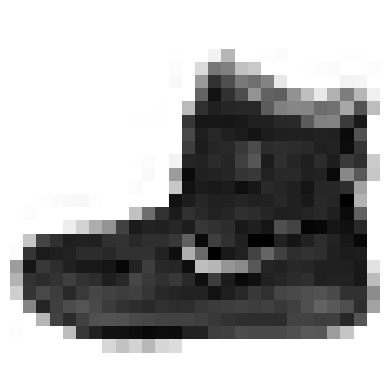

In [ ]:
# Display one training data image

plt.imshow(X_train[0]/255.0, cmap="binary")
plt.axis('off')
plt.show()


# Build a multiclass linear classifier

In [ ]:
# Q4 (1 point): Write code here to train multiclass classifier

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_score, recall_score

X_train = X_train.reshape(-1,784)
X_test = X_test.reshape(-1,784)

sgdc = SGDClassifier(loss='log_loss',random_state=42)
sgdc.fit(X_train,y_train)







SGDClassifier(loss='log_loss', random_state=42)

In [ ]:
# Q5 (1 point) what are the weights/parameters for the classifier corresponding to sandal(class=5).

sgdc.intercept_[5]

np.float64(683.0541515254564)

In [ ]:
sgdc.coef_[5]

#There are 784 weights for 784 features

array([ 0.00000000e+00,  8.53426903e-01,  8.52164436e-01,  8.19340295e-01,
        2.30526398e+00,  1.33318060e+00,  1.94293594e+00, -4.74057043e+00,
       -3.82731911e+00, -4.36884466e+00,  1.88441489e+00, -1.06408029e+01,
        1.31178152e+01, -1.94574209e+01, -4.28843824e+01, -6.21047067e+01,
       -1.18790489e+01,  4.51314799e+01, -1.35368200e+01,  4.11338615e+01,
       -1.26921126e+01, -1.79054336e+01, -1.15916528e+01,  1.99219412e+01,
        2.79852270e+01,  1.76770624e+01,  1.35803577e+01,  1.42166411e+01,
       -1.64120713e-02,  8.37014832e-01,  8.23127694e-01,  5.90833648e-01,
        5.50434818e-01, -1.97197621e+00,  1.66191050e+01, -8.64316575e+00,
       -2.24623990e+00, -9.76065719e+00,  5.74953647e+00,  1.13626858e+01,
       -1.12411866e+00, -1.05375929e+01, -6.31892170e+00, -3.62219510e+00,
       -5.75903912e+00, -3.10203358e+01,  4.91004752e+00, -1.01810571e+00,
        4.06608833e+01,  6.35858438e+00, -1.42777662e+00, -2.91007296e+01,
       -1.77874752e+01,  

In [ ]:
# Q6 (2 point) Predict on X_test. From this prediction on X_test, find precision and recall for the classifier corresponding to class sandal(5).

In [ ]:
X_test = X_test.reshape(-1,784)
predict= sgdc.predict(X_test)

#sgdc.decision_function(X_test[0].reshape(1,-1))



In [ ]:
from sklearn.metrics import precision_score,recall_score

precision = precision_score(y_test,predict,average=None)
recall = recall_score(y_test,predict,average=None)
(precision[5],recall[5])

(np.float64(0.9422657952069716), np.float64(0.865))

## Build SVM Classifier for two classes (binary)

In [ ]:
# Q7 (1 point): Write code here to train an SVM classifier that classifies between just two classes sandal(5) and sneaker(7)
cl_a, cl_b = 5, 7

X_train_5or7 = X_train[((y_train == cl_a) | (y_train == cl_b))]
y_train_5or7 = y_train[((y_train == cl_a) | (y_train == cl_b))]


X_train_5or7 = X_train_5or7.reshape(-1,784)
(X_train_5or7.shape,y_train_5or7.shape)

from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train_5or7)

svm_clf = LinearSVC(C=1, loss="hinge", dual=True,random_state=42,max_iter=100000)
svm_clf.fit(X_train_scaled,y_train_5or7)



/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1, dual=True, loss='hinge', max_iter=100000, random_state=42)

In [ ]:
# Q8 (2 point): Predict on a subset of y_test that is just sandal or sneaker. Then compute precision and recall. Is this better than what you get in Q7 above?


X_test_5or7 = X_test[((y_test == cl_a) | (y_test == cl_b))]
y_test_5or7 = y_test[((y_test == cl_a) | (y_test == cl_b))]

svm_predict = svm_clf.predict(X_test_5or7)


precision_svm = precision_score(y_test_5or7,svm_predict,average=None)
recall_svm = recall_score(y_test_5or7,svm_predict,average=None)

(precision_svm[0],recall_svm[0])

#Better precision than Q6

(np.float64(0.9913793103448276), np.float64(0.805))